In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.patches as mpatch
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [80]:
def decision_tree(X,y):
    
    feature_names = X.columns
    
    target_names = "play"
    
    ### Building the decision tree using scikit learn function
    model = tree.DecisionTreeClassifier(max_depth=5)
    
    model.fit(X, y)
    
    ###saving the no of samples in each node in list
    samples = model.tree_.n_node_samples

    values = model.tree_.value
    
    ###saving the features used in the decision tree
    features = [feature_names[i] if i >=0 else 'target' for i in model.tree_.feature]
    
    ### saving the threshold values used for creating the child nodes
    thresholds = model.tree_.threshold
    
    ### saving the gini impurity values 
    impurities = model.tree_.impurity
    
    criterion = model.criterion
    
    node_count = model.tree_.node_count
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    
    links = []
    links_left = []
    links_right = []
    link = {}
    for i, child_left in enumerate(children_left):
        if child_left != -1:
            link['source'] = i
            link['target'] = child_left
            links.append(link.copy())
            links_left.append(link.copy())
    for i, child_right in enumerate(children_right):
        if child_right != -1:
            link['source'] = i
            link['target'] = child_right
            links.append(link.copy())
            links_right.append(link.copy())
    
    def calc_nodes_height(node_count, max_depth, links):
        heights_list = list(range(node_count))
        heights_list[0] = max_depth
        k = [0]
        for i in range(node_count):
            tmp = []
            for link in links:
                if link['source'] in k:
                    heights_list[link['target']] = heights_list[link['source']] - 1
                    tmp.append(link['target'])
            k = tmp.copy()
            
        return heights_list
    
    nodes_height = calc_nodes_height(
        model.tree_.node_count,
        model.tree_.max_depth,
        links
    )
    
    class_ids = []
    for value in values:
        class_ids.append(np.argmax(value))
    classes = [target_names[i] for i in class_ids]
    
    texts = []
    for i in range(node_count):
        if not features[i] == 'target':
            text = f'{features[i]} <= {thresholds[i]:,.2f}\n'
        else:
            text = ''
        text += f'{criterion} = {impurities[i]:.2f}\n\
    samples = {samples[i]}\n\
    values = {values[i]}\n\
    class = {classes[i]}'
        texts.append(text)
    
    
    child_counts = []
    for i in range(node_count):
        child_count = 0
        for link in links:
            if link['source'] == i:
                child_count += 1
        child_counts.append(child_count)
    
    
    base_distance = 0.35
    append_coordinate = [base_distance * -1, base_distance]
    x_dict = {}
    for i in range(node_count):
        x_dict[i] = None
    x_dict[0] = 0
    for i in range(node_count):
        tmp = 0
        for link in links:
            if link['source'] == i:
                x = x_dict[link['source']] + append_coordinate[tmp]
                height = nodes_height[link['target']]
                for j, node_height in enumerate(nodes_height):
                    try:
                        if (round(height, 1) == round(node_height, 1))\
                        and (round(x_dict[j], 1) == round(x, 1)):
                            x += base_distance * 2
                    except TypeError:
                        
                        pass
                        
                x_dict[link['target']] = x
                tmp += 1
    
    
    diffs_dict = {}
    for link in links:
        diff = x_dict[link['source']] - x_dict[link['target']]
        if round(diff, 1) < base_distance * -2:
            height = nodes_height[link["target"]]
            for heigh in range(height + 1):
                nodes = [i for i, x in enumerate(nodes_height) if x == heigh]
                for node in nodes:
                    x_dict[node] -= base_distance
    
    fig = plt.figure(
        figsize=[
            (max(x_dict.values()) - min(x_dict.values())) * 6,
            nodes_height[0] * 2
        ]
    )
    ax = fig.add_subplot(111)
    
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)
    ax.tick_params(labelbottom="off",bottom="off")
    ax.tick_params(labelleft="off",left="off")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlim(min(x_dict.values()), max(x_dict.values()))
    
    viz_x = {}
    viz_y = {}
    for i in range(node_count):
        viz_x[i] = x_dict[i]
        viz_y[i] = nodes_height[i]
    
    rect_width = 0.55
    rect_height = 0.7
    
    for i, text in enumerate(texts):
        rectangle = mpatch.Rectangle(
            (viz_x[i], viz_y[i]),
            rect_width,
            rect_height,
            color=cm.tab20(class_ids[i]),
            alpha=1 - impurities[i]
        )
        ax.add_artist(rectangle)
    
        rx, ry = rectangle.get_xy()
        cx = rx + rectangle.get_width()/2.0
        cy = ry + rectangle.get_height()/2.0
        ax.annotate(text, (cx, cy), color='black', 
                    fontsize=10, ha='center', va='center')
    
    for link  in links:
        x = x_dict[link['source']] + rect_width / 2
        y = nodes_height[link['source']]
        dx = x_dict[link['target']] + rect_width / 2
        dy = nodes_height[link['target']] + rect_height
        ax.annotate(s='', xy=(dx, dy), xytext=(x, y),
                xycoords='data',
                arrowprops=dict(
                    facecolor='gray', 
                    width =0.1,
                    headwidth=10.0,
                    headlength=10.0,
                    shrink=0)
               )

    ax.set_xlim(min(x_dict.values()), max(x_dict.values()) + rect_width)
    _ = ax.set_ylim(min(nodes_height), max(nodes_height) + rect_height)

# fig.savefig('ranjan/desktop/decision_tree.png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


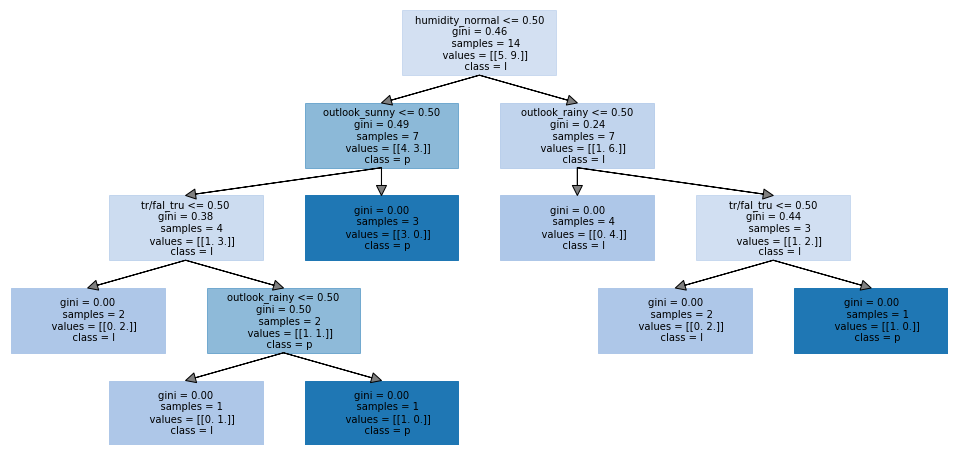

In [91]:
data = pd.read_excel("C:/Users/kxj133/Downloads/DT_Example.xlsx")

## Since the data is in nominal catagorical data, we creating the dummies for the catagories
X = pd.get_dummies(data[data.columns.difference(['play'])],drop_first= True)

y = data['play']

decision_tree(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


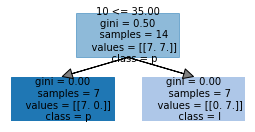

In [90]:
data_1 = pd.read_excel("C:/Users/kxj133/Downloads/task_9_5/EX.xlsx")

X = data_1[data_1.columns.difference([0])]

y = data_1[0]

decision_tree(X,y)